# Fitting from amalgams

We continue with the first phase, where we are not considering sequences, leave alone syntax trees, in prediction. Instead we are using the frequency of (shallow) occurence of names in types to predict the (shallow) occurence in definitions.

We are considering the sixth model in our sequence. This learns scaling for a name in a statement being in the definition using a custom layer. We also regularize and use droputs, so overfitting is not serious.

## Structure of the model

The models has the following similar structure

* there is a common representation of the input data.
* a prediction is made from this of a component the output name distribution (we call this the _low rank prediction_).
* the other component is the input scaled, i.e., it is assumed that elements in the statement are in the proofs but with scaling. The scaling has two factors:
    - the main factor is learnt for individual names based on a custom layer;
    - we also use weights determined from the representation (not too good as mentioned)
* the components are put together.

In [1]:
import amalgam_predict as pred

loaded 6823 triples, which use 6823 names
Separated into data_triples: 3984 and test_triples: 463
Model: "factorization_model1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 6823)]       0           []                               
                                                                                                  
 repr (Dense)                   (None, 10)           68240       ['input_1[0][0]']                
                                                                                                  
 prob_self (Dense)              (None, 1)            11          ['repr[0][0]']                   
                                                                                                  
 low_rank_out (Dense)           (None, 6823)         75053       ['repr[0][0]'] 

In [2]:
import keras
from matplotlib import pyplot as plt

In [3]:
hist = pred.fit(1024, pred.model6)

Epoch 1/1024
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
60/63 [===========================>..] - ETA: 0s - loss: 6.4309 - kullback_leibler_divergence: 6.3438WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x7f1082d830e0> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAP

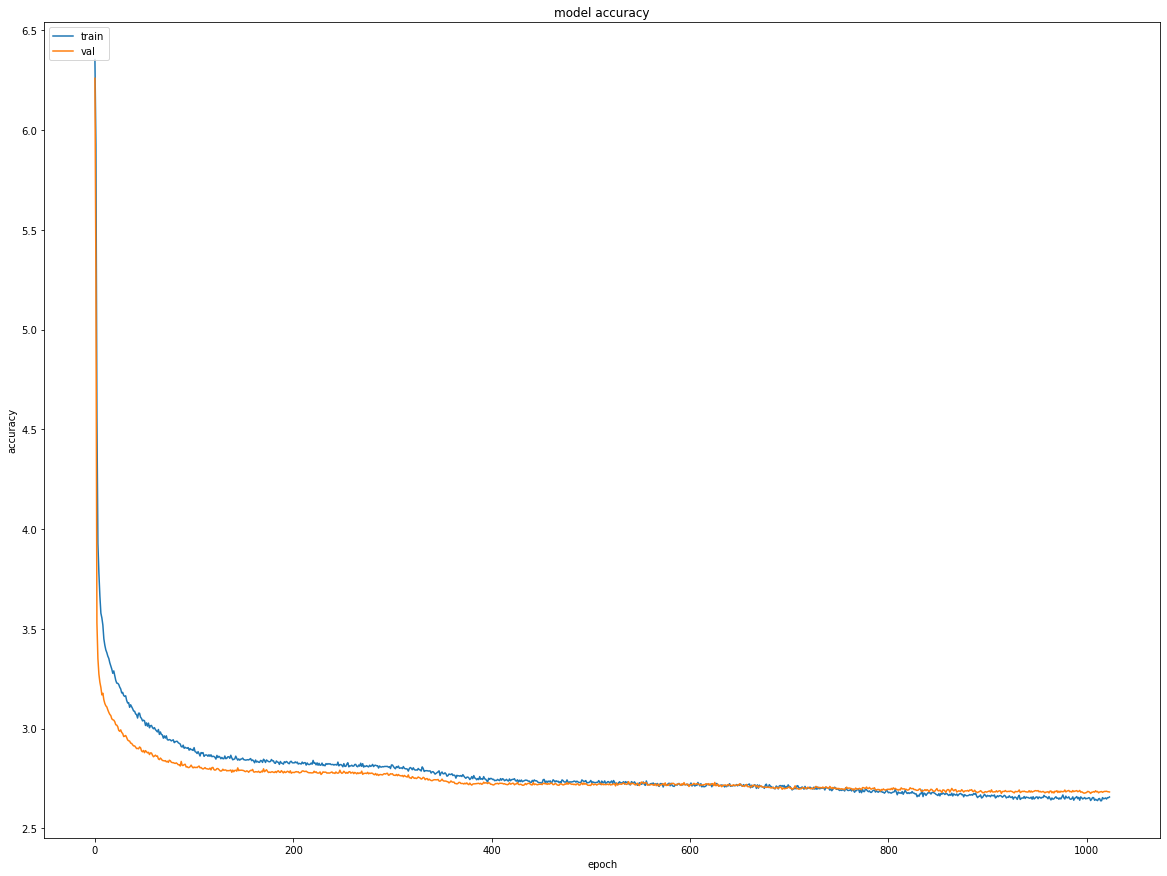

In [4]:
plt.rcParams['figure.figsize'] = [20, 15]
plt.plot(hist.history['kullback_leibler_divergence'])
plt.plot(hist.history['val_kullback_leibler_divergence'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

* Assuming no bugs, this is a correct model for imput just being term distribution.
* Should experiment with larger dimensions etc.